## NOTEBOOK DESCRIPTION:

This notebook does data analysis on the number of comments per channel according to the THRESHOLD value selected on `/helpers/config_threshold_value.py`

In [1]:
import pickle
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

scriptpath = "/home/jouven/youtube_projects"
sys.path.append(os.path.abspath(scriptpath))
from helpers.config_threshold_value import *

In [2]:
# First create the directory so store function corresponding to the THRESHOLD value
if not os.path.exists(COMMON_PATH): 
    os.makedirs(COMMON_PATH)

### Analysing the number of comments per channel in the comments dataset

In [3]:
# Retrieve the comments_per_channel dictionnary already computed
with open("/dlabdata1/youtube_large/jouven/comments_per_channel.pkl",'rb') as f:
     comments_per_channels = pickle.load(f)
f.close()

In [4]:
# Number of comments sorted in decreasing order for plotting
sorted_comments = np.array(sorted(comments_per_channels.values(), reverse = True))

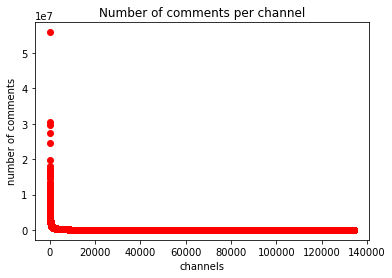

In [5]:
# Plot the number of comments per channel
plt.plot(sorted_comments, 'ro')
plt.ylabel('number of comments')
plt.xlabel('channels')
plt.title('Number of comments per channel')
plt.show()

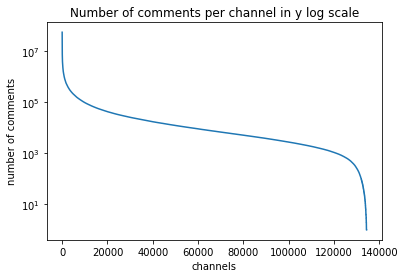

In [6]:
# Plot the number of comments per channel on the y-log scale
plt.plot(sorted_comments)
plt.yscale('log')
plt.ylabel('number of comments')
plt.xlabel('channels')
plt.title('Number of comments per channel in y log scale')
plt.show()

On the figure above we can see that some channels have a large number of comments whereas some channels only have a few comments. 
To derive optimal/meaningful vector representation out of the channels, we decided to take channels that have more than 300 channels

In [7]:
selected_comments = sorted_comments[sorted_comments >= THRESHOLD]
selected_channel_id = [key for key in comments_per_channels if (comments_per_channels[key] >= THRESHOLD)]

In [8]:
print(str(len(selected_comments)) + ' channels having selected !')

17716 channels having selected !


In [9]:
total_comments = 0
subset_comments = 0

for comments in sorted_comments:
    total_comments += comments
for comments in selected_comments:
    subset_comments += comments

percentage_comments = 100 * subset_comments / total_comments

In [10]:
print('The percentage of channel used is ', percentage_comments, '%')

The percentage of channel used is  82.44121051632101 %


In [11]:
# Store the set of filtered channels: having more than THRESHOLD channels
with open(os.path.join(COMMON_PATH, "channels_more_"+THRESHOLD_NAME+".pkl"),'wb') as f:
    pickle.dump(selected_channel_id, f)
f.close()